In [104]:
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import numpy as np
import random 
import os 
import shutil


In [105]:
path = Path().absolute() # gemini helped since i have never really used pathlib before, self explanatory tho
original_data_path = path/"original_data"
train_data_path = original_data_path/"train"/"train"
test_data_path = original_data_path/"test"/"test"
train_data_path

WindowsPath('c:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/lab2/original_data/train/train')

In [106]:
train_image_list = list(train_data_path.iterdir())
images = random.sample(train_image_list, 10)  # i have create a list of all the paths and this now randomly samples 10 paths from that list and stores it in images


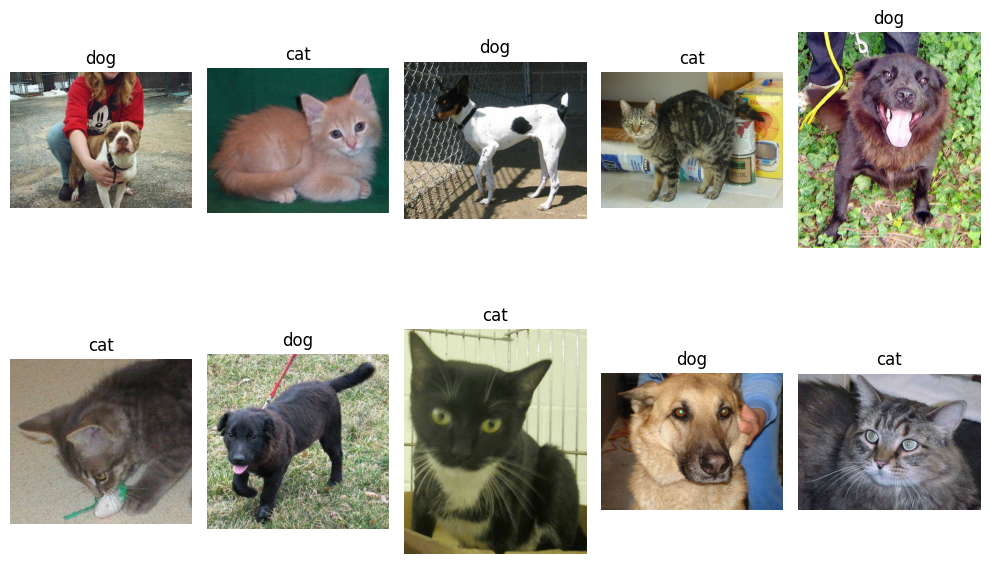

In [107]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_data_path, images[i])
    image = plt.imread(image_path)       
    ax.imshow(image)                    
    filename = os.path.basename(image_path)  # Get filename from path
    ax.set_title(filename[:3])
    ax.axis("off")

fig.tight_layout()  

In [109]:
import os
import random
import shutil

def move_files(source_data_path, dest_data_path, no_of_files ):
    source = source_data_path 
    dest = dest_data_path 

    files = os.listdir(source)
    num_files = no_of_files  

    for file_name in random.sample(files, num_files): # using random.sample ensures that we get entries from files, wihtout replacment
        shutil.move(os.path.join(source, file_name), dest)

In [120]:
ex_small_data = path/"experiment_small_data"
ex_small_test = ex_small_data/"test"
ex_small_train = ex_small_data/"train"
ex_small_val = ex_small_data/"val"

ex_tiny_data = path/"experiment_tiny_data"
ex_tiny_test = ex_tiny_data/"test"
ex_tiny_train = ex_tiny_data/"train"
ex_tiny_val = ex_tiny_data/"val"


In [121]:
# move_files(train_data_path, ex_small_train, 1600) dont run it twice...
move_files(test_data_path, ex_small_test, 500)
move_files(train_data_path, ex_small_val, 400)

move_files(train_data_path, ex_tiny_train, 160)
move_files(test_data_path, ex_tiny_test, 50)
move_files(train_data_path, ex_tiny_val, 40)


In [124]:
def count_files_test(path):

  count = 0
  for entry in os.scandir(path):
    if entry.is_file():
      count += 1
  return count

count_files_test(ex_small_train), count_files_test(ex_small_test), count_files_test(ex_small_val)
count_files_test(ex_tiny_train), count_files_test(ex_tiny_test), count_files_test(ex_tiny_val)

(160, 50, 40)

In [138]:
import cv2


# def label_data(data_path):


#     images = []
#     labels = []

#     for root, _, filenames in os.walk(data_path): # struggled here, research more, had help 
#         for filename in filenames:
#             label = 0  
#             if "dog" in filename.lower():  # set all to 0 if dog is in filename
#                 label = 1

#             image_path = os.path.join(root, filename)
#             try:
#                 image = cv2.imread(image_path)
#                 if image is not None:  # Check if image is successfully loaded
#                     images.append(image)
#                     labels.append(label)
#             except (cv2.error, OSError) as e:
#                 print(f"Error loading image: {image_path} ({e})")

#     return images, np.array(labels)

# # Example usage

# images, labels = label_data(ex_tiny_train)



AttributeError: 'numpy.ndarray' object has no attribute 'read'

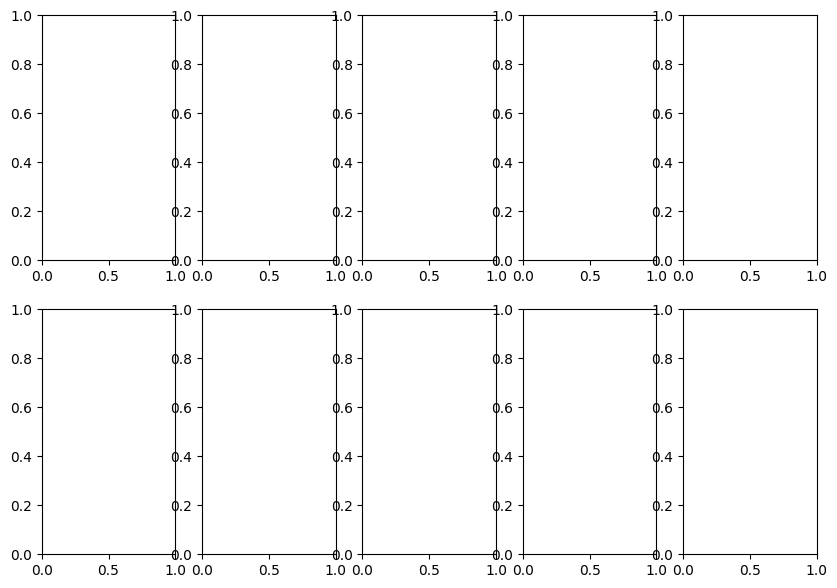

In [132]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image = plt.imread(images[i])       
    ax.imshow(image)                    
    ax.set_title(labels[i])
    ax.axis("off")

fig.tight_layout()  